# PCA Correlation Analysis

This notebook demonstrates how to perform PCA (Principal Component Analysis) on a dataset, visualize the correlations between features, and handle missing values.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
csv_file_path = 'parts_wrangled.csv'
data = pd.read_csv(csv_file_path)

# Display the first few rows of the data
data.head()

,AREA_GEOGRAFICA,PROYECTO,INSTALACION,USUARIO,TIPO_USUARIO,TIPO_ASISTENCIA,EQUIPO,TIPO_EQUIPO,TIPO_FRACCION,TIPO_AVERIA,...,ACOMPANANTE,TRABAJO_FINALIZADO,RED_VERTIDO,ORDEN_TRABAJO,TIPO_ORDEN,TIEMPO_FECHAPREVISTA_FECHAFINALIZACION,HAY_MATERIALES_TEXTO,CANTIDAD_MATERIALES,COSTO,CLASS
0,4,42,4201,9.0,3,1,0,0,0,3,...,0,1,1,515,1,2,0,131,812538,1
1,4,42,4201,9.0,3,1,0,0,0,3,...,0,0,1,516,1,0,0,131,812538,1
2,4,42,4201,9.0,3,2,5853,5200,0,1,...,0,0,1,3188,1,8,0,131,812538,1
3,4,42,4201,9.0,3,2,5853,5200,0,1,...,0,0,1,3217,1,15,0,131,812538,1
4,4,42,4201,9.0,3,2,5853,5200,0,1,...,0,0,1,3218,1,7,0,131,812538,1


In [3]:
# Select only numeric columns and handle missing values
numeric_data = data.select_dtypes(include=[np.number])
numeric_data_filled = numeric_data.fillna(numeric_data.mean())

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data_filled)

In [4]:
# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Extract PCA components for plotting
L = pca.components_.T  # Loadings (correlation between original variables and principal components)
s = np.sqrt(np.sum(L**2, axis=1))  # Lengths of loading vectors
header_row = numeric_data_filled.columns.tolist()  # Original feature names

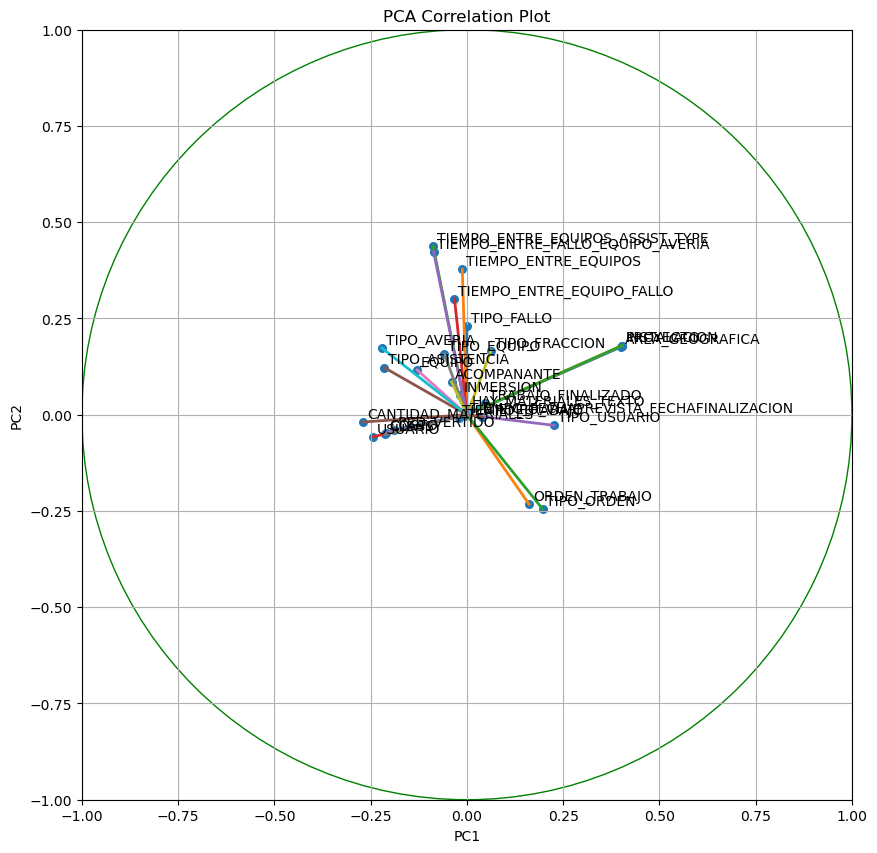

In [5]:
# Create the correlation plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.grid()
plt.axis([-1, 1, -1, 1])

# Add a unit circle
circ = plt.Circle((0, 0), radius=1, color='g', fill=False)
ax.add_patch(circ)
ax.set_aspect('equal')

# Scatter plot of loadings
plt.scatter(L[:, 0], L[:, 1], s=30)

# Draw lines from origin to each loading vector
for row in range(0, len(s)):
    plt.plot([0, L[row, 0]], [0, L[row, 1]], linewidth=2, label='X1')

# Annotate the loadings with variable names
for row in range(0, len(s)):
    ax.annotate(header_row[row], (L[row, 0] + 0.01, L[row, 1] + 0.01))

# Add labels and title
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.title('PCA Correlation Plot')
fig.set_size_inches(15, 10)
fig.savefig('PCA_Correlation_Plot.jpg', dpi=300)
plt.show()